<h1 style="text-align: center;" markdown="1">TP1: Analisis Exploratorio Properati Data</h1>
![](../data/icon_properati-data.png)

In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#join de varios datasets
properties1 = pd.read_csv('../data/properati-AR-2017-08-01-properties-sell-six_months.csv', low_memory=False)
properties2 = pd.read_csv('../data/properati-AR-2017-07-01-properties-sell-six_months.csv', low_memory=False)
properties3 = pd.read_csv('../data/properati-AR-2017-02-01-properties-sell.csv', low_memory=False)
properties4 = pd.read_csv('../data/properati-AR-2017-01-01-properties-sell.csv', low_memory=False)

#la idea es contactenar varios dataframes y despues dropear las filas repetidas
properties = pd.concat([properties1,properties2,properties3,properties4]).drop_duplicates()

In [3]:
properties['created_on'] = pd.to_datetime(properties['created_on'], format='%Y-%m')

In [4]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264838 entries, 0 to 59724
Data columns (total 27 columns):
id                            264838 non-null object
created_on                    264838 non-null datetime64[ns]
operation                     264838 non-null object
property_type                 264838 non-null object
place_name                    264800 non-null object
place_with_parent_names       264838 non-null object
country_name                  264838 non-null object
state_name                    264838 non-null object
geonames_id                   223195 non-null float64
lat-lon                       188969 non-null object
lat                           188969 non-null float64
lon                           188969 non-null float64
price                         230583 non-null float64
currency                      228249 non-null object
price_aprox_local_currency    230583 non-null float64
price_aprox_usd               230583 non-null float64
surface_total_in_m2         

In [5]:
properties.describe()

/opt/conda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,2.231950e+05,188969.000000,188969.000000,2.305830e+05,2.305830e+05,2.305830e+05,185163.000000,2.244180e+05,155968.000000,1.989170e+05,23296.000000,139743.000000,2.799700e+04
mean,3.567788e+06,-34.651849,-59.262295,4.276255e+05,4.060437e+06,2.404053e+05,249.645907,9.047460e+03,2084.262311,6.140643e+03,19.328125,3.051094,4.989699e+03
std,3.810354e+05,2.015076,2.303960,1.628977e+06,6.536863e+06,3.864314e+05,1979.380295,4.221834e+06,2641.400364,2.463395e+04,151.321514,1.714600,1.212933e+05
min,3.427208e+06,-54.833014,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e-05,1.000000,1.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,5.000000e+07,200000.000000,2.000000e+09,206333.333333,4.000000e+06,7167.000000,40.000000,1.000150e+07


In [6]:
properties.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,ad916bad59cdaf3c24c2d594547aa6067c4d6289,2017-02-01,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,0de2ae882e1708c2941a672402f772ec83a92827,2017-02-01,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,61cb773b63b911ad2ea5c823187d7ba1c7f3cadf,2017-02-01,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,5f9403a3bac230379afec9a2601bd6e3db3bc0b9,2017-02-01,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,130ed5140d7492ae631465d2b038668bd7b8436b,2017-02-01,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [7]:
#todas las propiedades son de Argentina?
properties[properties['country_name'] != 'Argentina'].shape

(0, 27)

In [8]:
#cantidad de valores nulos por columna
print(properties.isnull().sum())

id                                 0
created_on                         0
operation                          0
property_type                      0
place_name                        38
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    41643
lat-lon                        75869
lat                            75869
lon                            75869
price                          34255
currency                       36589
price_aprox_local_currency     34255
price_aprox_usd                34255
surface_total_in_m2            79675
surface_covered_in_m2          40420
price_usd_per_m2              108870
price_per_m2                   65921
floor                         241542
rooms                         125095
expenses                      236841
properati_url                      0
description                        9
title                              0
image_thumbnail                 4582
d

In [9]:
#cantidad de publicaciones por lugar
properties['place_name'].value_counts()

Mar del Plata                          18159
Córdoba                                16636
Rosario                                15034
Nordelta                                7453
Tigre                                   6780
Palermo                                 6431
Belgrano                                6128
La Plata                                5214
Caballito                               4956
Pilar                                   4956
Recoleta                                3547
Olivos                                  3507
Ramos Mejía                             3468
Villa Urquiza                           3153
Barrio Norte                            3037
Villa Crespo                            3008
Almagro                                 2879
Flores                                  2829
Pinamar                                 2764
Capital Federal                         2653
Ituzaingó                               2631
Martínez                                2460
San Isidro

In [10]:
#Y por provincia
properties['state_name'].value_counts()

Capital Federal                 73102
Bs.As. G.B.A. Zona Norte        59367
Buenos Aires Costa Atlántica    26367
Bs.As. G.B.A. Zona Sur          25240
Bs.As. G.B.A. Zona Oeste        22846
Córdoba                         22003
Santa Fe                        18906
Buenos Aires Interior            6290
Neuquén                          1544
Río Negro                        1497
Mendoza                          1446
Misiones                         1202
Entre Ríos                        959
Tucumán                           905
Salta                             652
Corrientes                        621
San Luis                          508
Chubut                            408
La Pampa                          334
Tierra Del Fuego                  133
Chaco                             131
Catamarca                          83
San Juan                           77
Santa Cruz                         71
Formosa                            65
Jujuy                              56
Santiago Del

In [11]:
properties['place_with_parent_names'].value_counts()

|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|                        18159
|Argentina|Santa Fe|Rosario|                                                  15034
|Argentina|Córdoba|Córdoba|                                                   11098
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|                            7453
|Argentina|Capital Federal|Palermo|                                            6431
|Argentina|Capital Federal|Belgrano|                                           6128
|Argentina|Córdoba|                                                            5538
|Argentina|Capital Federal|Caballito|                                          4956
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|                                     4674
|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|                                     4073
|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La Plata|                           3812
|Argentina|Capital Federal|Recoleta|                                        

In [12]:
properties_caba = properties[properties['place_with_parent_names'].str.contains('Capital Federal') \
                             | properties['place_with_parent_names'].str.contains('Bs.As. G.B.A.')]

# Donde se encuentran las propiedades mas caras en cuanto a precio?

En principio deberiamos tener solo en cuenta las propiedas que tienen precio debido a que son las propiedas que nos ayudaran a estimar el valor de nuevas propiedades

In [13]:
properties_with_price = properties_caba[properties_caba['price'].notnull()]
properties_with_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165584 entries, 0 to 59724
Data columns (total 27 columns):
id                            165584 non-null object
created_on                    165584 non-null datetime64[ns]
operation                     165584 non-null object
property_type                 165584 non-null object
place_name                    165546 non-null object
place_with_parent_names       165584 non-null object
country_name                  165584 non-null object
state_name                    165584 non-null object
geonames_id                   129317 non-null float64
lat-lon                       115396 non-null object
lat                           115396 non-null float64
lon                           115396 non-null float64
price                         165584 non-null float64
currency                      164783 non-null object
price_aprox_local_currency    165584 non-null float64
price_aprox_usd               165584 non-null float64
surface_total_in_m2         

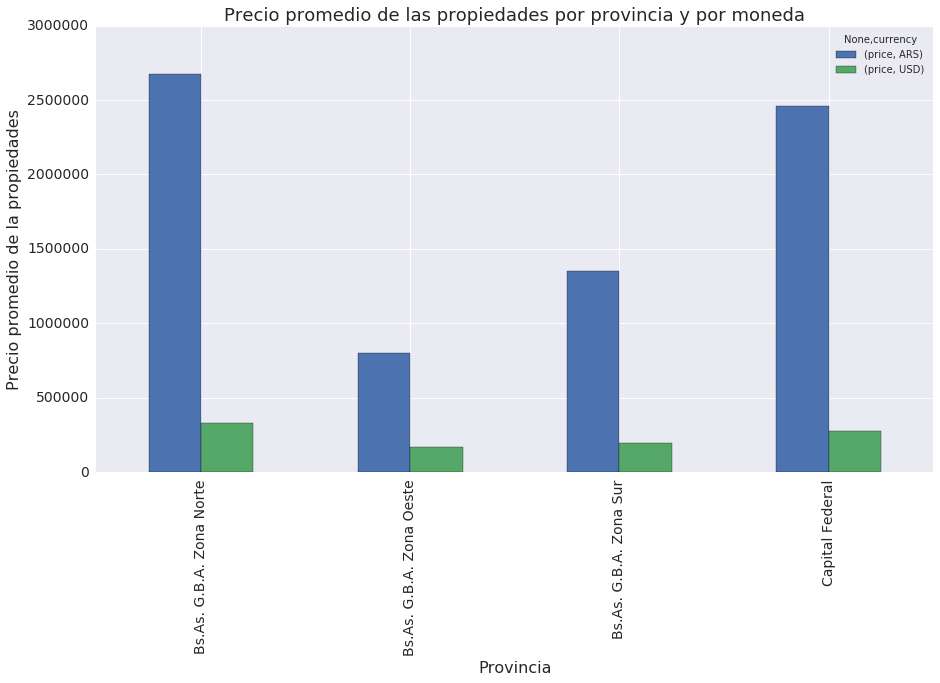

In [14]:
properties_with_price.loc[properties_with_price['currency'].isin(['ARS','USD'])\
                          ,['state_name','price', 'currency']]\
.groupby(['state_name','currency']).mean().unstack()\
    .plot(kind='bar', rot=90, figsize=(15,8) , stacked=False, fontsize=14);
plt.title('Precio promedio de las propiedades por provincia y por moneda', fontsize=18);
plt.xlabel('Provincia', fontsize=16);
plt.ylabel('Precio promedio de la propiedades', fontsize=16);

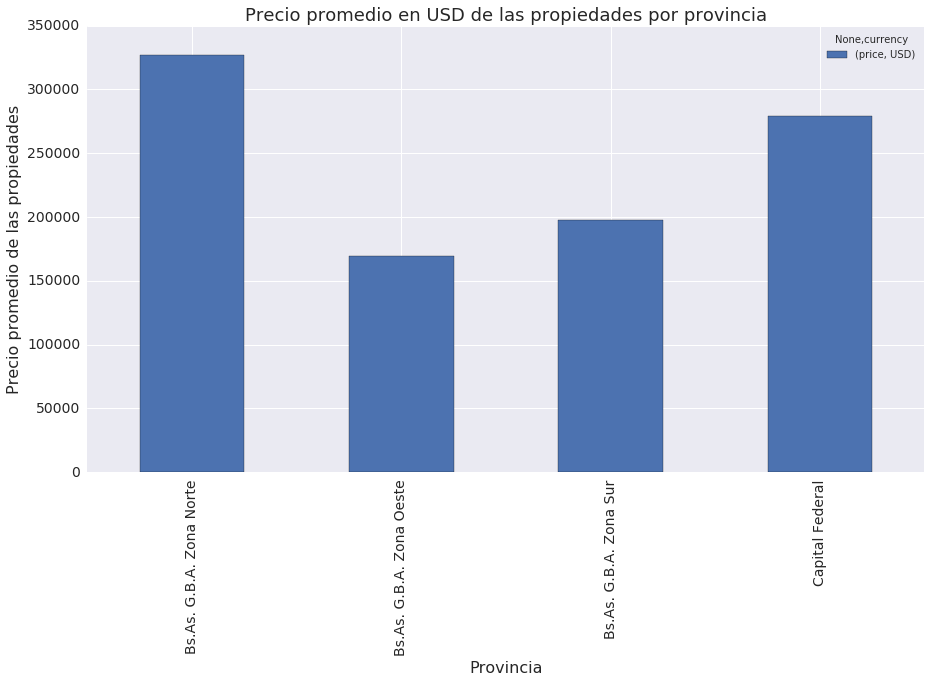

In [15]:
properties_with_price.loc[properties_with_price['currency'] == 'USD'\
                          ,['state_name','price', 'currency']]\
.groupby(['state_name','currency']).mean().unstack()\
    .plot(kind='bar', rot=90, figsize=(15,8), fontsize=14);
plt.title('Precio promedio en USD de las propiedades por provincia', fontsize=18);
plt.xlabel('Provincia', fontsize=16);
plt.ylabel('Precio promedio de las propiedades', fontsize=16);

# Como varian los precios segun la fecha en que se publicaron?

In [16]:
def date_to_year_month(d):
    return str(d.year)+"-"+("%02d" % (d.month,))

properties_caba['created_on'] = properties_caba['created_on'].map(date_to_year_month)

properties_grouped_bycreatedon = properties_caba.loc[properties_caba['currency'] == 'USD',['state_name','price', 'created_on']]\
    .groupby(['created_on']).agg(['mean','count'])
    
#properties_grouped_bycreatedon.reset_index(inplace=True)
properties_grouped_bycreatedon.tail()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


price       
                     mean  count
created_on                      
2017-04     303532.211571  15262
2017-05     251993.600022  18341
2017-06     259844.919138  20739
2017-07     266334.353042  38106
2017-08     251060.000000    110

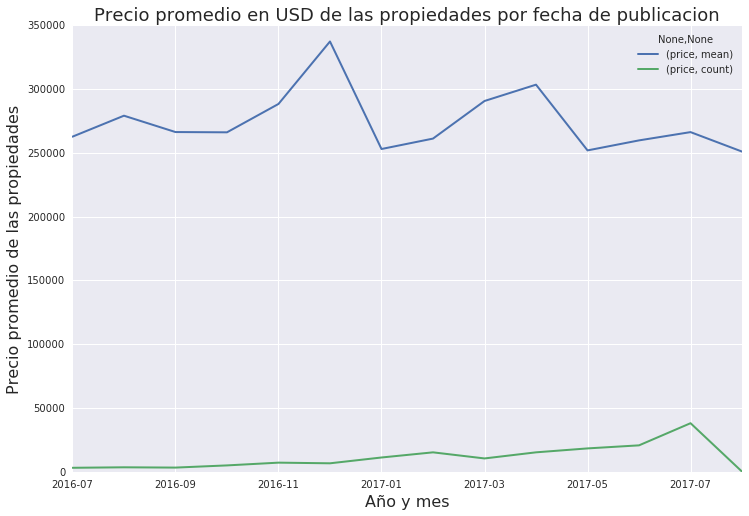

In [17]:
properties_grouped_bycreatedon.plot(rot=0, linewidth=2,figsize=(12,8));
plt.title('Precio promedio en USD de las propiedades por fecha de publicacion', fontsize=18);
plt.xlabel('Año y mes', fontsize=16);
plt.ylabel('Precio promedio de las propiedades', fontsize=16);

Podemos ver como en el ultimo año incrementaron la cantidad de publicaciones pero a su vez como disminuyo el precio promedio de las propiedades

# Existe alguna relacion entre el precio de la propiedad y la superficie total/cubierta en m2?
Creemos que por al menos en Capital Federal las propiedades que tienen una superficie descubierta son mas caras que las que no

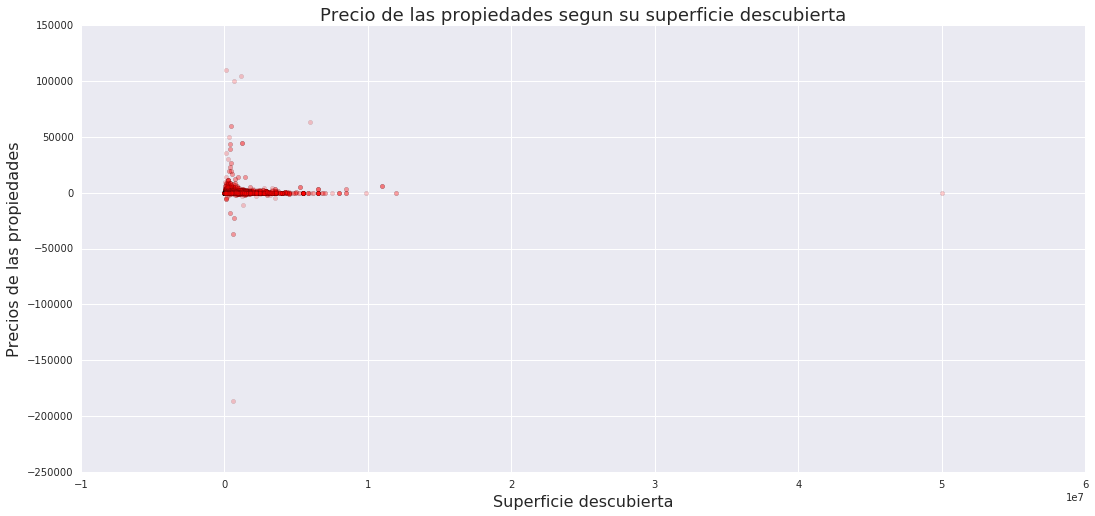

In [18]:
#agarro las propiedades que tienen tanto superficies cubiertas como totales
properties_with_price_and_surface = properties_with_price[properties_with_price['surface_total_in_m2'].notnull()]

properties_with_price_and_surface = properties_with_price_and_surface.assign(surface_discovered_in_m2 = \
    properties_with_price_and_surface['surface_total_in_m2']-properties_with_price_and_surface['surface_covered_in_m2'])

properties_with_price_and_surface.loc[properties_with_price_and_surface['currency'] == 'USD',\
   ['surface_total_in_m2','surface_covered_in_m2','surface_discovered_in_m2','price','price_per_m2']]\
    .plot.scatter('price','surface_discovered_in_m2',alpha=0.20,figsize=(18,8), color='red');
plt.title('Precio de las propiedades segun su superficie descubierta', fontsize=18);
plt.xlabel('Superficie descubierta', fontsize=16);
plt.ylabel('Precios de las propiedades', fontsize=16);

No se ve ninguna relacion. Deberiamos comparar la superficie cubierta contra la total y ver que encontramos.

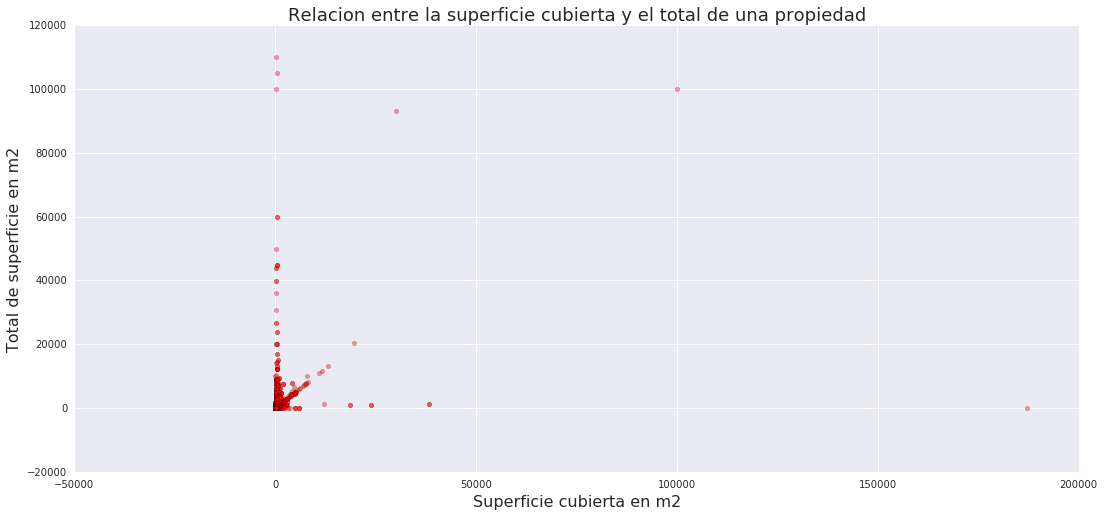

In [19]:
properties_with_price_and_surface.loc[:,['surface_covered_in_m2','surface_total_in_m2']]\
    .plot.scatter('surface_covered_in_m2','surface_total_in_m2', alpha=0.40,figsize=(18,8), color='red')
plt.title('Relacion entre la superficie cubierta y el total de una propiedad', fontsize=18);
plt.xlabel('Superficie cubierta en m2', fontsize=16);
plt.ylabel('Total de superficie en m2', fontsize=16);

Parece haber una especia de tendencia lineal en ciertas propiedades, sin embargo, no parece ser parametro de nada

# Existe alguna relacion entre precios y cantidad de habitaciones o pisos?

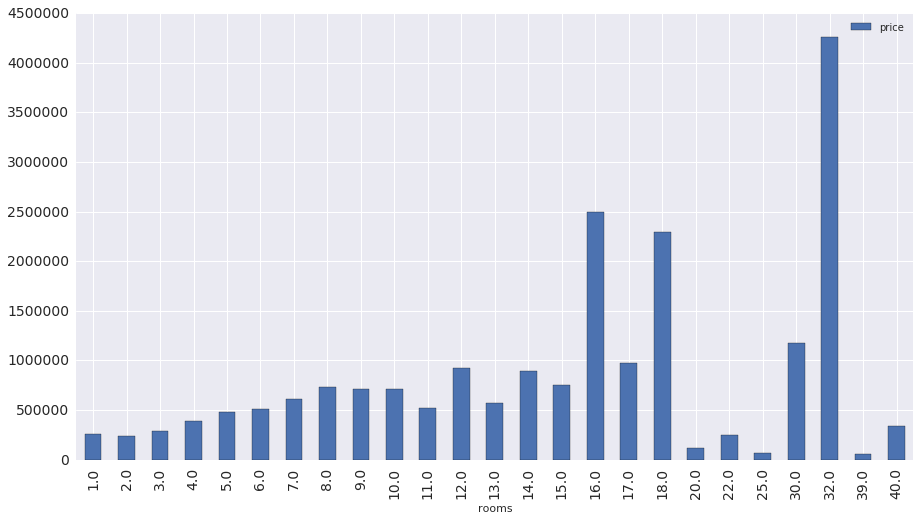

In [20]:
properties_caba[properties_caba['rooms'].notnull()][['rooms','price']]\
    .groupby(['rooms']).mean()\
    .plot(kind='bar', figsize=(15,8), fontsize=14);

Parece haber poca cantidad de propiedades en algunos promedios. Entonces vamos a pedir un minimo de propiedades a graficar

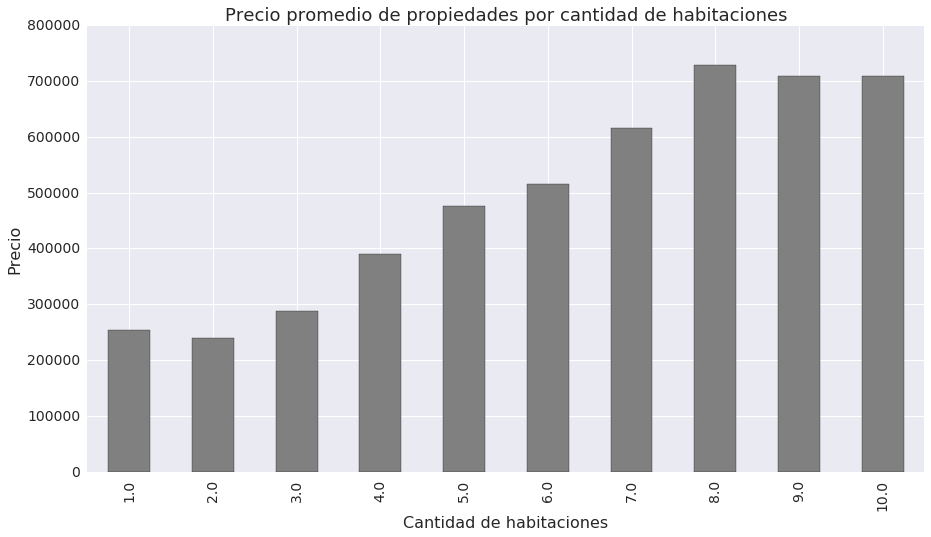

In [21]:
grouped_properties_byrooms = properties_caba[properties_caba['rooms'].notnull()][['rooms','price']]\
    .groupby(['rooms']).agg([np.mean,np.size])
grouped_properties_byrooms.loc[grouped_properties_byrooms['price','size']>50,:]\
    .unstack()['price','mean'].plot(kind='bar', figsize=(15,8), fontsize=14, color='gray');
plt.title('Precio promedio de propiedades por cantidad de habitaciones', fontsize=18);
plt.xlabel('Cantidad de habitaciones', fontsize=16);
plt.ylabel('Precio', fontsize=16);

Como  era de esperarse, a medida que aumentan la cantida de habitaciones aumenta el precio. Seguramente pasa lo mismo con la cantidad de pisos

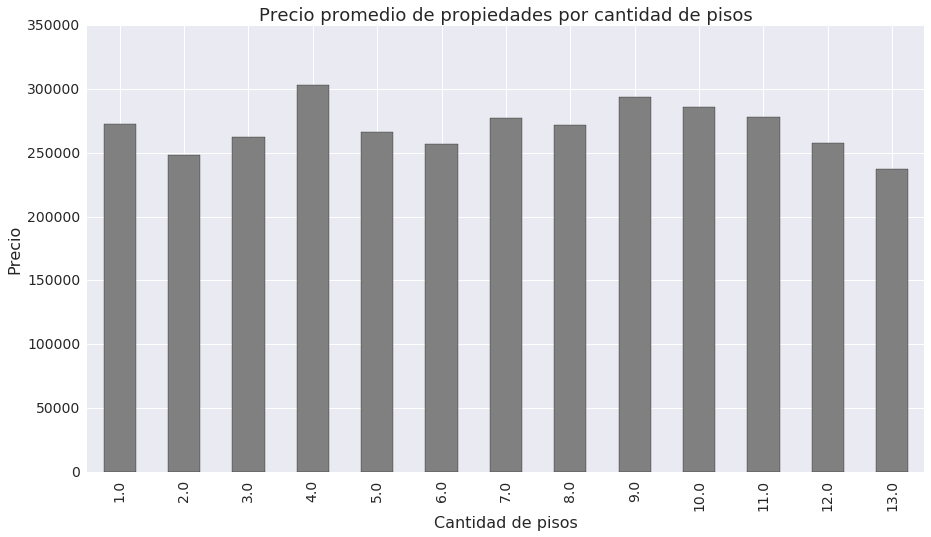

In [22]:
grouped_properties_byfloor = properties_caba[properties_caba['floor'].notnull()]\
    [['floor','price']].groupby(['floor']).agg([np.mean,np.size])
grouped_properties_byfloor.loc[grouped_properties_byfloor['price','size']>100,:]\
    .unstack()['price','mean'].plot(kind='bar', figsize=(15,8), fontsize=14, color='gray');
plt.title('Precio promedio de propiedades por cantidad de pisos', fontsize=18);
plt.xlabel('Cantidad de pisos', fontsize=16);
plt.ylabel('Precio', fontsize=16);

#### Pero de estos, cuantos son departamentos y cuantos PH o casas?

Se nos ocurrio hacer un scatter plot que mostrar la cantidad de contra la cantidad de habitaciones donde podemos agregarle dos dimensiones mas: el tamano de las burbujas puede indicar el precio de los inmuebles y el color de las mismas puede indicar el tipo de propiedad. Con esto logramos relacionar 4 dimensiones diferentes en un solo grafico

In [23]:
properties_caba['property_type'].value_counts()

apartment    104142
house         59563
PH            10891
store          5959
Name: property_type, dtype: int64

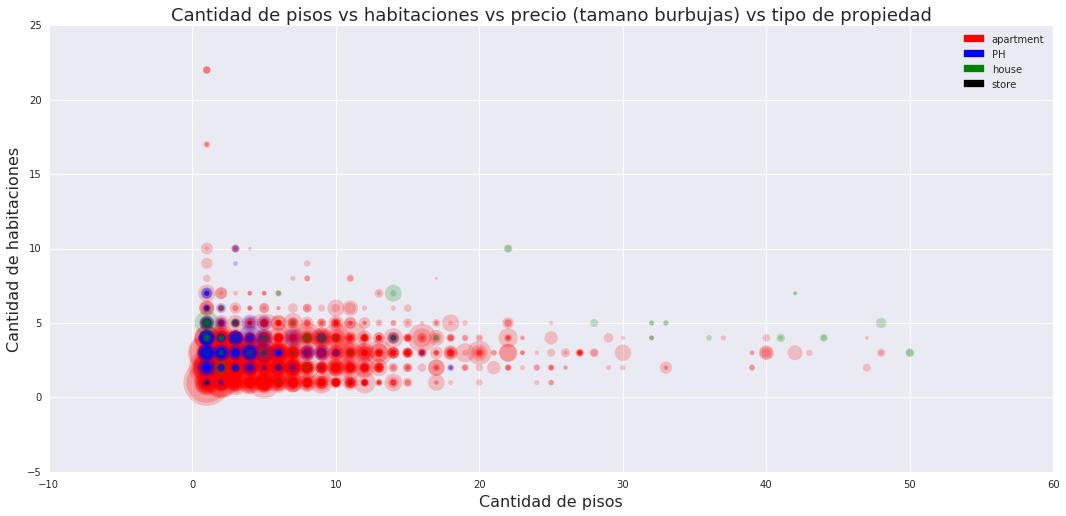

In [58]:
import matplotlib.patches as mpatches

alpha = 0.20
aspect = 5000
floors = 50

def getForAxis(properties, property_type, axis):
    return properties.loc[(properties['property_type']==property_type) & (properties['floor']<=floors),axis]
    
fig, ax = plt.subplots(figsize=(18,8))

#properties_caba.loc[properties_caba['price'].notnull(),:]\
 #   .plot.scatter('floor','rooms'
ax.scatter(getForAxis(properties_caba,'apartment','floor'),getForAxis(properties_caba,'apartment','rooms'), c='red',\
           s=properties_caba['price'].map(lambda x: x/aspect), label='apartment', alpha=alpha, edgecolors='none')

ax.scatter(getForAxis(properties_caba,'PH','floor'),getForAxis(properties_caba,'PH','rooms'), c='blue', 
         s=properties_caba['price'].map(lambda x: x/aspect), label='PH', alpha=alpha, edgecolors='none')

ax.scatter(getForAxis(properties_caba,'house','floor'),getForAxis(properties_caba,'house','rooms'), c='green', 
           s=properties_caba['price'].map(lambda x: x/aspect), label='house', alpha=alpha, edgecolors='none')

ax.scatter(getForAxis(properties_caba,'store','floor'),getForAxis(properties_caba,'store','rooms'), c='black', 
           s=properties_caba['price'].map(lambda x: x/aspect), label='store', alpha=alpha, edgecolors='none')

ax.legend()
ax.grid(True)

NA = mpatches.Patch(color='red', label='apartment')
EU = mpatches.Patch(color='blue', label='PH')
AP = mpatches.Patch(color='green', label='house')
SA = mpatches.Patch(color='black', label='store')
plt.legend(handles=[NA,EU,AP,SA], loc=1)

plt.title('Cantidad de pisos vs habitaciones vs precio (tamano burbujas) vs tipo de propiedad', fontsize=18);
plt.xlabel('Cantidad de pisos', fontsize=16);
plt.ylabel('Cantidad de habitaciones', fontsize=16);

plt.show()

Limitamos la cantidad de pisos a menos de 60 debido a que nos parecia algo ilogico que existan edificios (o hasta casas) con mas de 100 pisos. Este campo se puede modificar con la variable 'floors'

# Como se ubican geograficamente las propiedades publicadas

La idea es ubicar las propiedades publicadas en un plano y luego poder ir explotando diferentes graficos sobre el plano inicial

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


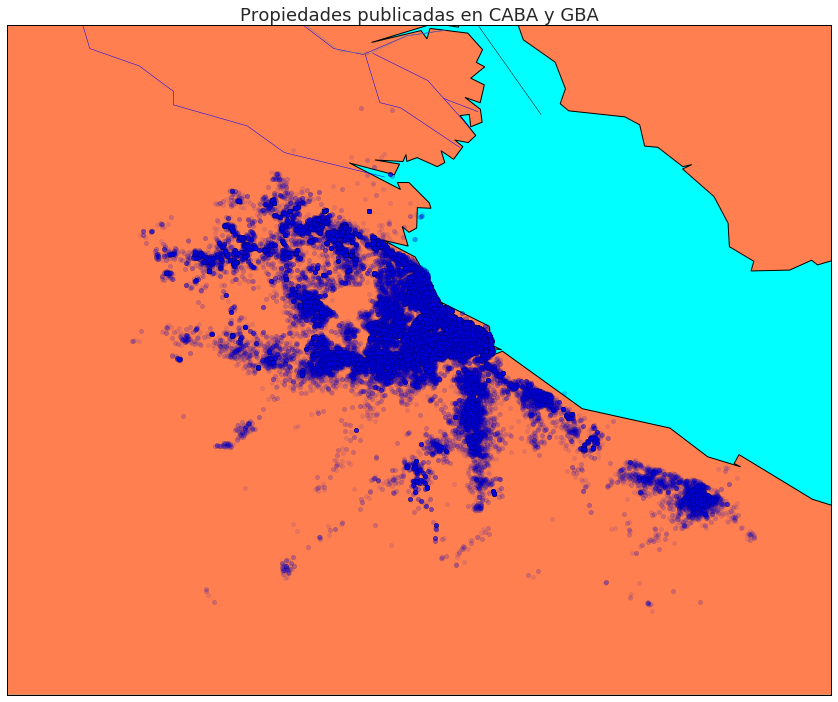

In [25]:
from scipy.misc import imread
import matplotlib.cbook as cbook
#install basemap with >conda install basemap
from mpl_toolkits.basemap import Basemap

sellslatlon = properties_caba
sellslatlon.dropna(subset=['lat'],inplace = True)
sellslatlon.dropna(subset=['lon'],inplace = True)

sellslatlon = sellslatlon[(sellslatlon['lat']>(-60)) & (sellslatlon['lat']<(-34))]
sellslatlon = sellslatlon[(sellslatlon['lon']>(-60)) & (sellslatlon['lon']<(-57.8))]

plt.figure(figsize=(20, 12))

m = Basemap(projection='merc', epsg=4326,
            llcrnrlat=-35.3, llcrnrlon=-59.3, 
            urcrnrlat=-34., urcrnrlon=-57.7,
            resolution='i')

m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.drawcountries()
m.drawrivers(color='#0000ff')
m.drawstates(color='0.5')
m.fillcontinents(color='coral',lake_color='aqua', zorder=0)

x, y = m(sellslatlon['lon'].tolist(),sellslatlon['lat'].tolist())
m.scatter(x, y, s=20, alpha=0.1, zorder=10)


plt.title('Propiedades publicadas en CABA y GBA', fontsize=18);

plt.show()

### Cuales son los tipos de propiedades que se publican en estas zonas?

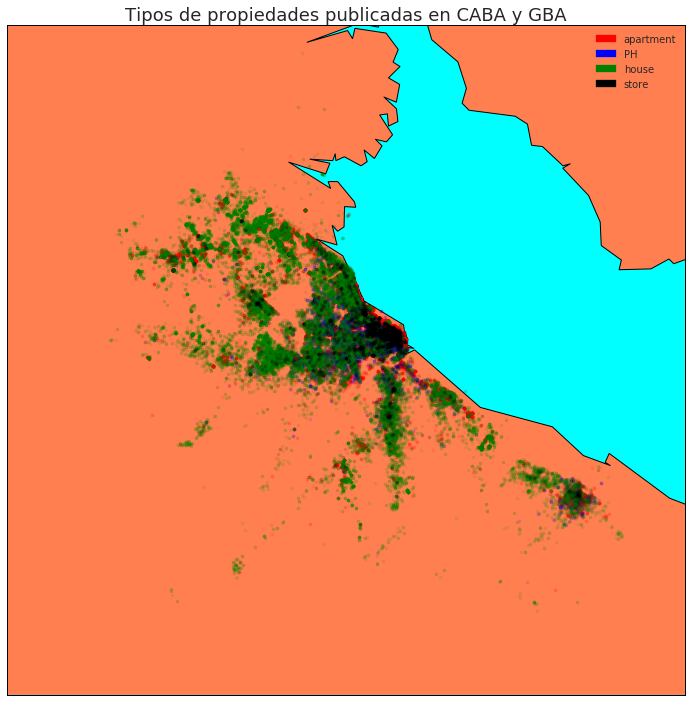

In [26]:
alpha = 0.1

plt.figure(figsize=(20, 12))

m = Basemap(projection='merc',
            llcrnrlat=-35.3, llcrnrlon=-59.3, 
            urcrnrlat=-34., urcrnrlon=-57.7,
            resolution='i')

m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua', zorder=0)

x, y = m(sellslatlon[sellslatlon['property_type']=='apartment']['lon'].tolist()\
         ,sellslatlon[sellslatlon['property_type']=='apartment']['lat'].tolist())
m.scatter(x, y, s=10, alpha=alpha, color='red', zorder=10)

x, y = m(sellslatlon[sellslatlon['property_type']=='PH']['lon'].tolist()\
         ,sellslatlon[sellslatlon['property_type']=='PH']['lat'].tolist())
m.scatter(x, y, s=10, alpha=alpha, color='blue', zorder=10)

x, y = m(sellslatlon[sellslatlon['property_type']=='house']['lon'].tolist()\
         ,sellslatlon[sellslatlon['property_type']=='house']['lat'].tolist())
m.scatter(x, y, s=10, alpha=alpha, color='green', zorder=10)

x, y = m(sellslatlon[sellslatlon['property_type']=='store']['lon'].tolist()\
         ,sellslatlon[sellslatlon['property_type']=='store']['lat'].tolist())
m.scatter(x, y, s=10, alpha=alpha, color='black', zorder=10)
    
NA = mpatches.Patch(color='red', label='apartment')
EU = mpatches.Patch(color='blue', label='PH')
AP = mpatches.Patch(color='green', label='house')
SA = mpatches.Patch(color='black', label='store')
plt.legend(handles=[NA,EU,AP,SA], loc=1)
plt.title('Tipos de propiedades publicadas en CABA y GBA', fontsize=18);

plt.show()

Debido a que la informacion aparece superpuesta, podriamos graficar por cada tipo de propiedad un grafico diferente

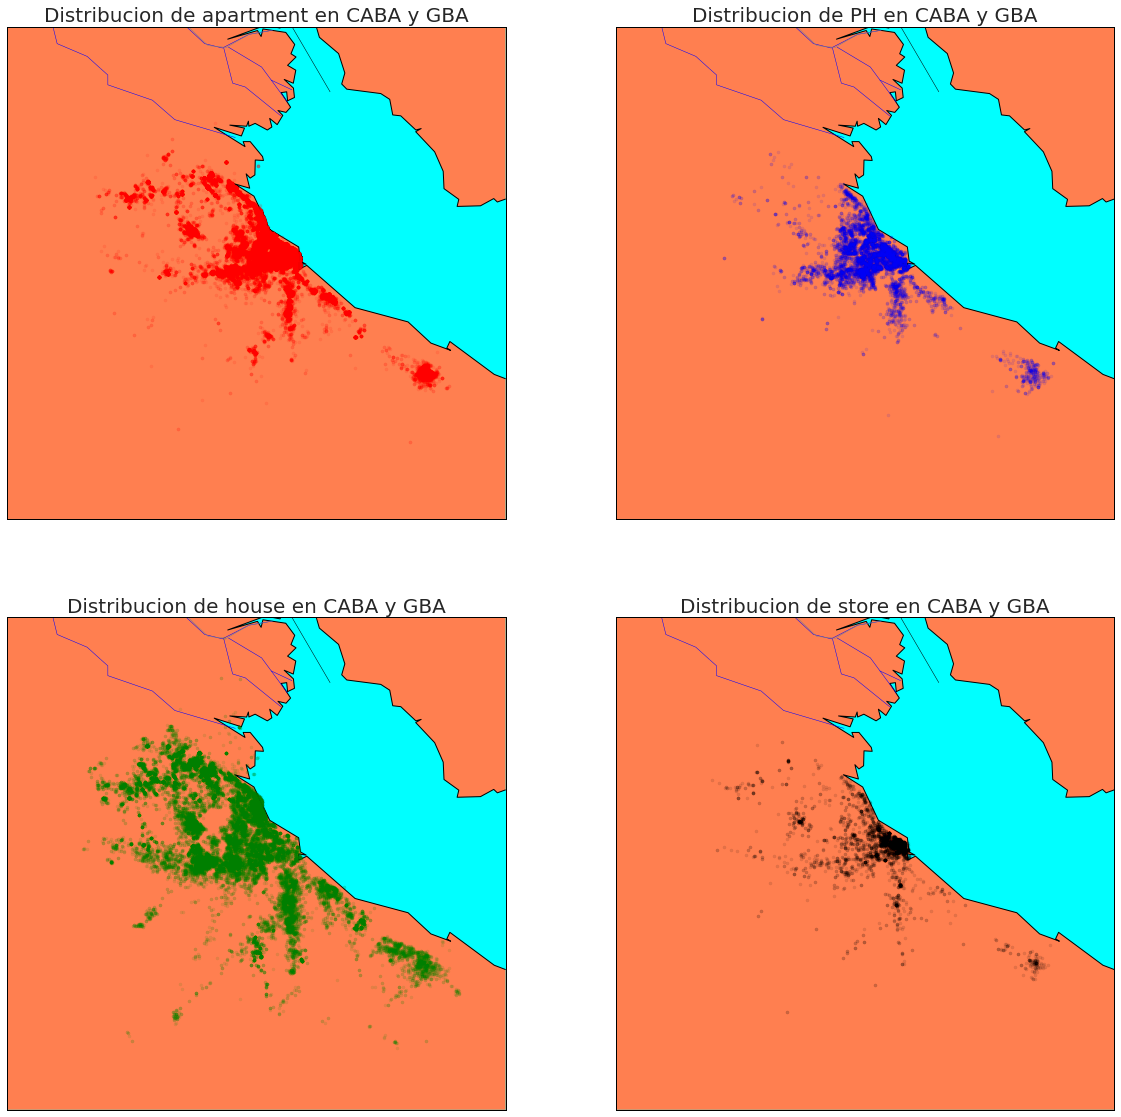

In [27]:
alpha = 0.1
plt.figure(figsize=(20, 30))

property_types = [(0,'apartment','red'), (1,'PH','blue'), (2,'house','green'),(3,'store','black') ]

for i, apartment, color in property_types:
    
    plt.subplot(321+i);

    m = Basemap(projection='merc',
                llcrnrlat=-35.3, llcrnrlon=-59.3, 
                urcrnrlat=-34., urcrnrlon=-57.7,
                resolution='i')

    m.drawcoastlines()
    m.drawmapboundary(fill_color='aqua')
    m.drawcountries()
    m.drawrivers(color='#0000ff')
    m.drawstates(color='0.5')
    m.fillcontinents(color='coral',lake_color='aqua', zorder=0)

    plt.title('Distribucion de '+apartment+' en CABA y GBA', fontsize=20)
    x, y = m(sellslatlon[sellslatlon['property_type'] == apartment]['lon'].tolist()\
             ,sellslatlon[sellslatlon['property_type'] == apartment]['lat'].tolist())
    m.scatter(x, y, s=10, alpha=alpha, color=color, zorder=10)

Podemos apreciar que la mayor concentracion de departamentos y PH se ubica en CABA. Mientraas que la concentracion de casas es mayor en GBA.

# Existe alguna relacion entre el precio de  las expensas y el valor de la propiedad?
En principio vamos a ver como se relaciona el valor de propiedad con las expensas de las propiedades

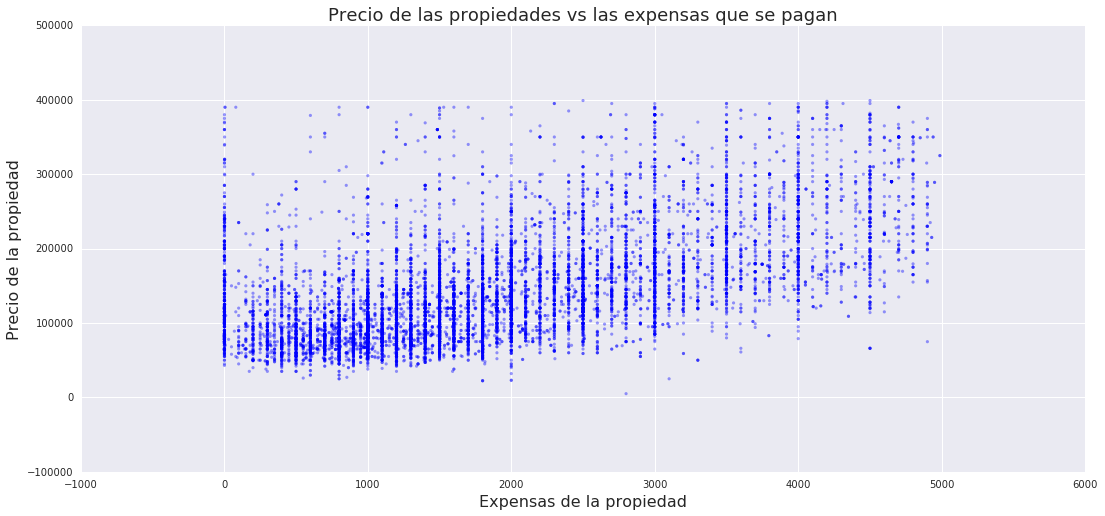

In [53]:
plt.figure(figsize=(18,8))

properties_price_and_expenses = properties_caba.loc[(properties_caba['price']>0) &\
                                                    (properties_caba['price']<400000) &\
                                                    #(properties_caba['expenses']>0) &\
                                                    (properties_caba['expenses']<5000),:]

plt.scatter(properties_price_and_expenses.loc[:,'expenses'], \
            properties_price_and_expenses.loc[:,'price'],\
            c='blue',s=10, alpha=0.4, edgecolors='none')

plt.title('Precio de las propiedades vs las expensas que se pagan', fontsize=18);
plt.xlabel('Expensas de la propiedad', fontsize=16);
plt.ylabel('Precio de la propiedad', fontsize=16);

plt.show()

Se puede ver que hay propiedades muchas propiedades que no pagan expensas. Esto se puede deber a los PH o casas.</br>
Tambien apreciamos que a medida que aumentan las expensas tambien aumenta la concentracion de propiedades que tienen un mayor precio. Suena logico

### Que sucede con las expensas y la cantidad de pisos?

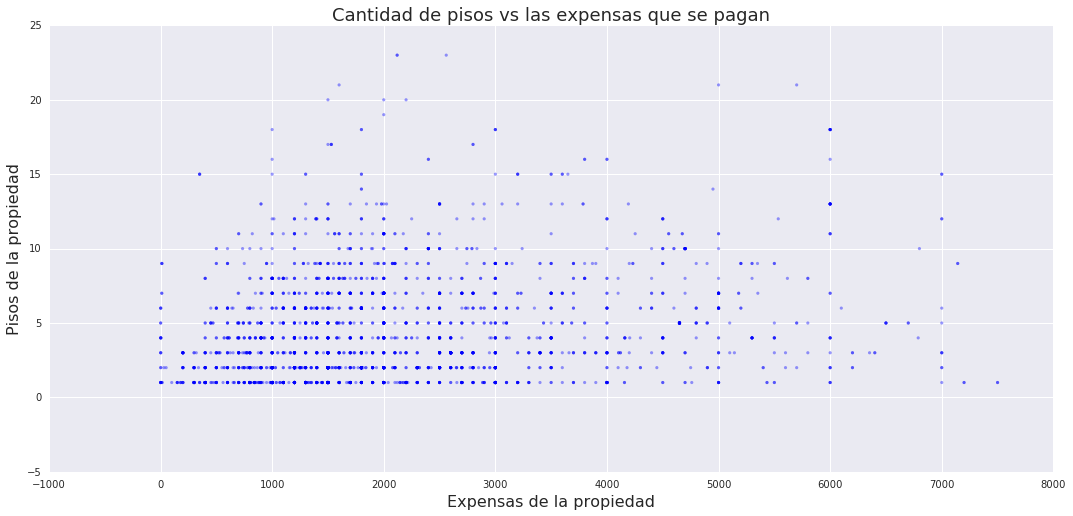

In [57]:
plt.figure(figsize=(18,8))

properties_floors_and_expenses = properties_caba.loc[(properties_caba['floor']>0) &\
                                                     (properties_caba['floor']<25) &\
                                                    #(properties_caba['expenses']>0) &\
                                                    (properties_caba['expenses']<8000),:]

plt.scatter(properties_floors_and_expenses.loc[:,'expenses'],\
            properties_floors_and_expenses.loc[:,'floor'], \
            c='blue',s=10, alpha=0.4, edgecolors='none')

plt.title('Cantidad de pisos vs las expensas que se pagan', fontsize=18);
plt.xlabel('Expensas de la propiedad', fontsize=16);
plt.ylabel('Pisos de la propiedad', fontsize=16);

plt.show()

Se puede apreciar que a medida que aumenta el precio de las expensas aumenta la concentracion de propiedades con mayor cantidad de pisos

### Que sucede con las expensas y el precio por m2?

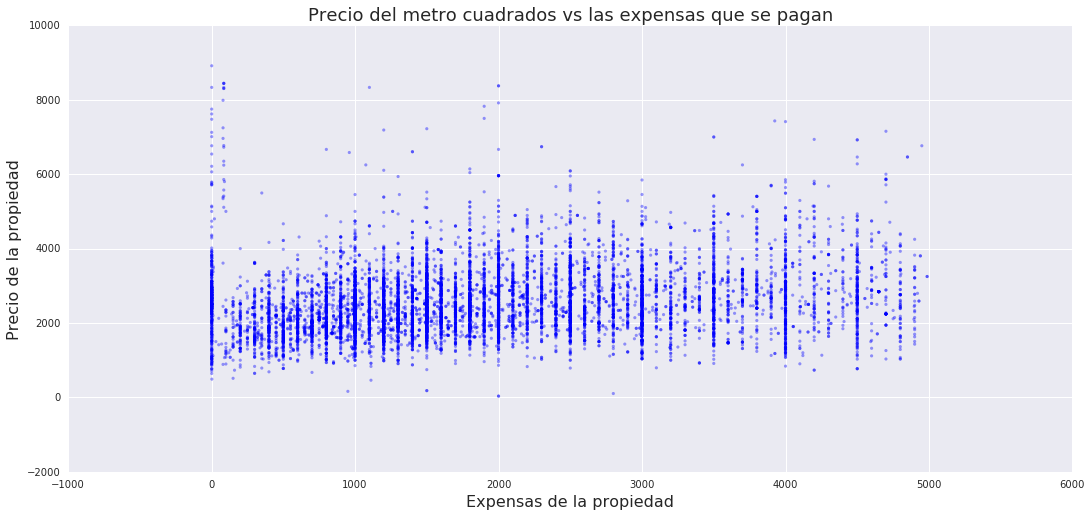

In [65]:
plt.figure(figsize=(18,8))

properties_price_and_expenses = properties_caba.loc[(properties_caba['price_per_m2']>0) &\
                                                    (properties_caba['price_per_m2']<10000) &\
                                                    #(properties_caba['expenses']>0) &\
                                                    (properties_caba['expenses']<5000),:]

plt.scatter(properties_price_and_expenses.loc[:,'expenses'],\
            properties_price_and_expenses.loc[:,'price_per_m2'], \
            c='blue',s=10, alpha=0.4, edgecolors='none')

plt.title('Precio del metro cuadrados vs las expensas que se pagan', fontsize=18);
plt.xlabel('Expensas de la propiedad', fontsize=16);
plt.ylabel('Precio de la propiedad', fontsize=16);

plt.show()